# Linear Regression

## Install Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the data into a dataframe

In [3]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Graph the data points

Text(0.5, 0, 'Year Experience')

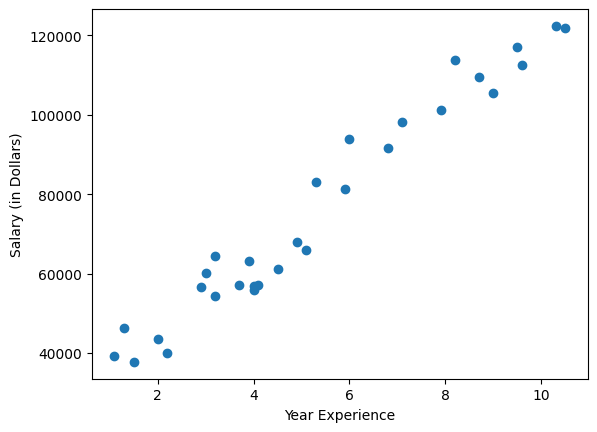

In [4]:
plt.plot(df['YearsExperience'], df['Salary'], 'o')
plt.ylabel("Salary (in Dollars)")
plt.xlabel("Year Experience")
plt.show

## Train a linear regression model

## Convert the dataframe to a numpy array

In [5]:
df = df.to_numpy()

## Separate the data into training and test sets

In [6]:
from sklearn.model_selection import train_test_split

X = df[:, 0]
y = df[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Define function for the parameter derivatives

In [12]:
def deriv(m, X, y, w, b):
    dj_dw_total = 0
    dj_db_total = 0
    for i in range(m):
        pred = w * X[i] + b
        dj_dw_total += (pred - y[i]) * X[i]
        dj_db_total += (pred - y[i])
    dj_dw = dj_dw_total / m
    dj_db = dj_db_total / m
    
    return dj_dw, dj_db

## Define a function for gradient descent

In [13]:
def gradient_descent(X, y, w, b, n_steps, alpha):
    for _ in range(n_steps):
        dj_dw, dj_db = deriv(X.size, X, y, w, b)
        
        tmp_w = w - alpha * dj_dw
        tmp_b = b - alpha * dj_db
        w = tmp_w
        b = tmp_b
        
    return w, b

## Print our optimized w and b parameters

In [16]:
w, b = gradient_descent(X_train, y_train, 0, 0, 100, .01)
w, b

(12134.920142774985, 6976.185370836447)

## Calculate the accuracy with the test set

In [43]:
total_err = 0
for i in range(X_test.size):
    y_pred = w * X_test[i] + b
    total_err += np.abs(y_pred - y_test[i])

print(total_err / X_test.size)


8467.962683641621


## Plot the our training points with the line of best fit

<function matplotlib.pyplot.show(close=None, block=None)>

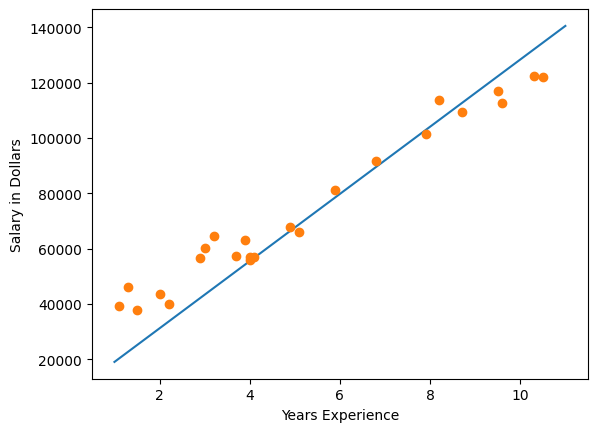

In [31]:
x = np.linspace(1, 11, 100)
yy = w * x + b

plt.plot(x, yy)
plt.plot(X_train, y_train, 'o')
plt.xlabel('Years Experience')
plt.ylabel('Salary in Dollars')
plt.show

## Plot the our training points with the line of best fit

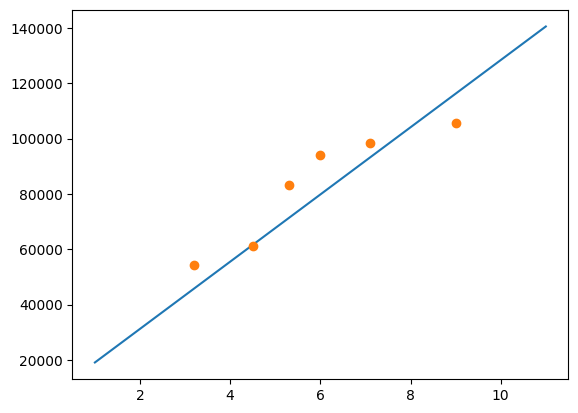

In [34]:
plt.plot(x, yy,)
plt.plot(X_test, y_test, 'o')
plt.show()

152595.22708413625